Mean Squared Error value is: 0.4408867972859236
R-squared value is: 0.8739857047112449
Accuaracy value is: 0.6064139941690962


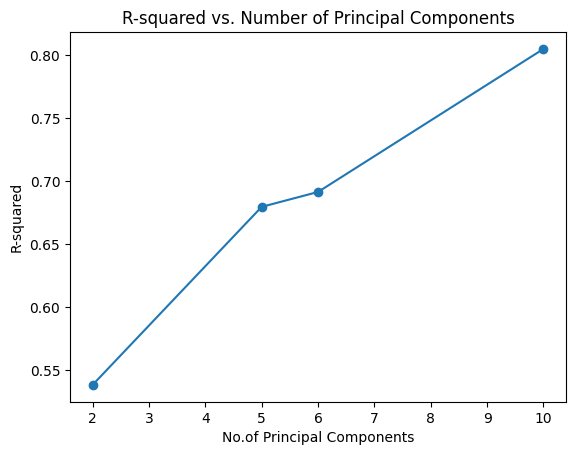

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Wine.csv')
X = data.drop('fixed acidity', axis=1)
y = data['fixed acidity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error value is: {mse}")
print(f"R-squared value is: {r2}")

tolerance = 0.5
accurate_predictions = np.abs(y_test - y_pred) <= tolerance
accuracy = accurate_predictions.mean()
print(f"Accuaracy value is: {accuracy}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_components_list = [2,5,6,10]
accuracies = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    accuracies.append(r2)

plt.plot(n_components_list, accuracies, marker='o')
plt.xlabel('No.of Principal Components')
plt.ylabel('R-squared')
plt.title('R-squared vs. Number of Principal Components')
plt.show()